# KC Housing: Data Cleaning

## Background Information

We will start by loading the data set. Afterwards, the next cells will serve to help familiarize ourselves with the data and we will then begin to strategize how best to manipulate the data to work with our python packages and move into exploratory data analysis. The dependent variable for this project is 'price' or in other words the variable we are trying better understand and in the end, be able to predict.

Basic information about some of the less intuitive variables can be found in the key followed by links below:
    
id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not

view - An index from 0 to 4 of how good the view of the property was

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r 

https://rstudio-pubs-static.s3.amazonaws.com/155304_cc51f448116744069664b35e7762999f.html





In [3]:
# importing various packages for data cleaning.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Data Cleaning

In [36]:
#importing the raw data set.
kc_housing = pd.read_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\cleaning-master\kc_house_data.csv')

In [37]:
# get a glimpse of the data set (first five columns)
kc_housing.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [34]:
kc_housing.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [6]:
#how big is the data set?
kc_housing.shape

(21597, 21)

In [7]:
#get an idea of the data types
kc_housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
#get an idea of high level statistics 
kc_housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the code above we have a few key insights on our KC housing data set. While it would not make sense to draw conclusions for some of the data using this method (such as zipcode),this method gives us a general idea of other variables such as 'price' and 'sqft_lot'.

Regression requires numerical data, looking at our data types contained within the data set we will not have to alter any during the data cleaning process.

## Data Cleaning

### Checking for Missing Data 

In [9]:
# check for missing data and sum values in column. 
kc_housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Dealing with missing data

For this project we will handle the missing values three ways. The first is dropping the columns with missing data and then the next two will be done through imputation. The 'id' column will not be needed during regression since the individual house is not what we are interested in but rather the physical properties of the houses. 

#### Drop columns, replace with 0's and imputing

In [38]:
#dropping 'id', 'date','waterfront', and 'yr_renovated' columns
kc_house_properties_dropped = kc_housing.drop(['yr_renovated', 'waterfront','date','id'], axis=1)

For imputation we will use the .fillna() method to fill missing values. We will use the median, mean, and most common values to fill the missing data creating three different dataframes and in the end, see which method yields the best model.

In [39]:
#fill with most common value 
kc_housing_most_common = kc_housing.fillna(kc_housing['yr_renovated'].value_counts().index[0])
kc_housing_most_common = kc_housing.fillna(kc_housing['waterfront'].value_counts().index[0])

In [40]:
# fill with the mean
kc_housing_mean = kc_housing.fillna(kc_housing['yr_renovated'].mean())
kc_housing_mean = kc_housing.fillna(kc_housing['waterfront'].mean())

In [41]:
#fill with the median 
kc_housing_median =  kc_housing.fillna(kc_housing['yr_renovated'].median())
kc_housing_median =  kc_housing.fillna(kc_housing['waterfront'].median())

In [42]:
#drop 'id' and 'date' for each of the modified databases
kc_housing_median = kc_housing_median.drop(['date','id'], axis=1)
kc_housing_mean  = kc_housing_mean.drop(['date','id'], axis=1)
kc_housing_most_common = kc_housing_most_common.drop(['date','id'], axis=1)

In [47]:
#Replacing with 0's 
kc_housing.loc[kc_housing.waterfront.isna(), 'waterfront'] = 0
kc_housing.waterfront = kc_housing.waterfront.astype('int')

In [66]:
kc_housing_full = kc_housing.drop(['id'], axis = 1)
#kc_housing_full.loc[kc_housing.view.isna(), 'view'] = 0
#kc_housing_full.view = kc_housing.view.astype('int')
kc_housing_full.loc[kc_housing.yr_renovated.isna(), 'yr_renovated'] = 0


## Data Types

For regression to work we need variables with numeric values. Let's check our new dataframes and see if any altering needs to be done. 

In [68]:
#check data types and size for each dataframe
kc_housing_full.info()
#kc_housing_median.info()
#kc_housing_mean.info()
#kc_housing_most_common.info()
#kc_house_properties_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int32
view             21597 non-null int32
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int32(2), int64(10), object(2)
memory usage: 3.1+ MB


### Outliers

Outliers have the ability to skew our analysis. Further, this project would help us find a great starter home by ignoring the homes with outlier prices since we know the vast majority of first home buyers are not looking for a mega mansion but also not a run down home either. A simple way to visualize outliers is by using a box and whisker plot.The dots represent outliers.

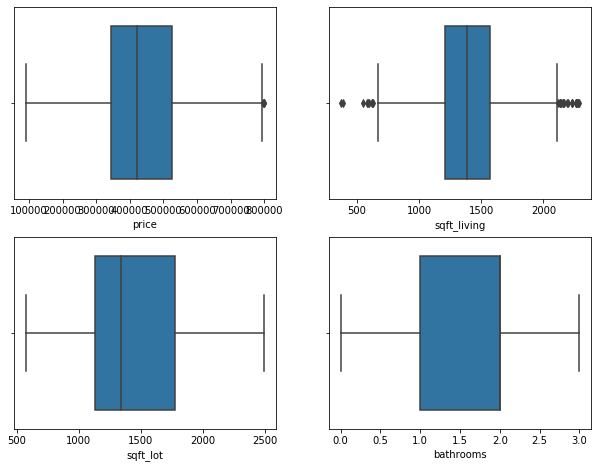

In [124]:

plt.figure(figsize=(16,12))

plt.subplot(331)
sns.boxplot(kc_housing_full.price)
plt.subplot(332)
sns.boxplot(kc_housing_full.sqft_living)
plt.subplot(334)
sns.boxplot(kc_housing_full.sqft_lot)
plt.subplot(335)
sns.boxplot(kc_housing_full.bathrooms.astype('int'))

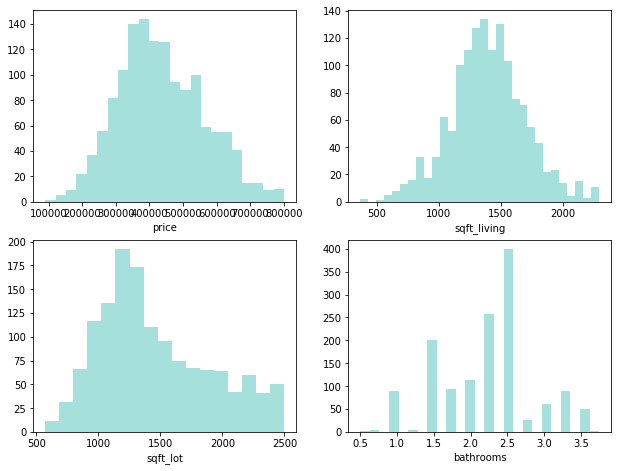

In [117]:

plt.figure(figsize=(16,12))

plt.subplot(331)
sns.distplot(kc_housing_full.price,kde=False, color ='lightseagreen')
plt.subplot(332)
sns.distplot(kc_housing_full.sqft_living,kde=False, color ='lightseagreen')
plt.subplot(334)
sns.distplot(kc_housing_full.sqft_lot,kde=False, color ='lightseagreen')
plt.subplot(335)
sns.distplot(kc_housing_full.bathrooms,kde=False, color = 'lightseagreen')

In [105]:
# remove outliers from kc_housing_full and subsequent dataframes 
kc_housing_full = kc_housing_full[kc_housing_full.price < 800000]
kc_housing_full = kc_housing_full[kc_housing_full.sqft_living < 2300]
kc_housing_full = kc_housing_full[kc_housing_full.sqft_lot < 2500]
kc_housing_full = kc_housing_full[kc_housing_full.bedrooms < 5]
kc_housing_full = kc_housing_full[kc_housing_full.bathrooms < 4]

In [129]:
kc_housing_median = kc_housing_median[kc_housing_median.price < 800000]
kc_housing_median = kc_housing_median[kc_housing_median.sqft_living < 2300]
kc_housing_median = kc_housing_median[kc_housing_median.sqft_lot < 2500]
kc_housing_median = kc_housing_median[kc_housing_median.bedrooms < 5]
kc_housing_median = kc_housing_median[kc_housing_median.bathrooms < 4]

In [111]:
kc_housing_mean = kc_housing_mean[kc_housing_mean.price < 800000]
kc_housing_mean = kc_housing_mean[kc_housing_mean.sqft_living <2300]
kc_housing_mean = kc_housing_mean[kc_housing_mean.sqft_lot < 2500]
kc_housing_mean = kc_housing_mean[kc_housing_mean.bedrooms < 5]
kc_housing_mean = kc_housing_mean[kc_housing_mean.bathrooms < 4]

In [113]:
kc_housing_most_common = kc_housing_most_common[kc_housing_most_common.price < 800000]
kc_housing_most_common = kc_housing_most_common[kc_housing_most_common.sqft_living < 8000]
kc_housing_most_common = kc_housing_most_common[kc_housing_most_common.sqft_lot < 2500]
kc_housing_most_common = kc_housing_most_common[kc_housing_most_common.bedrooms < 5]
kc_housing_most_common = kc_housing_most_common[kc_housing_most_common.bathrooms < 4]

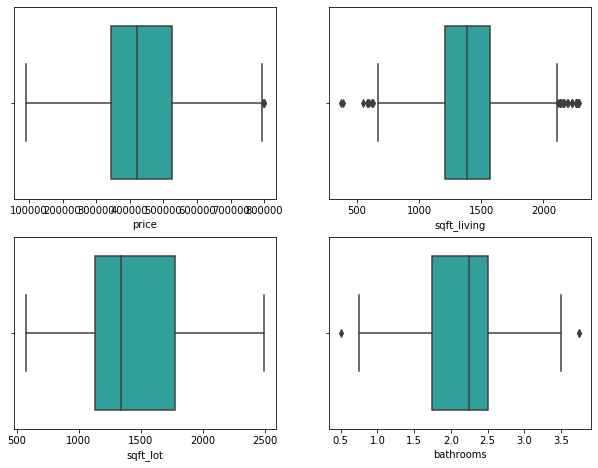

In [119]:
#visually check data again, much better! 

plt.figure(figsize=(16,12))

plt.subplot(331)
sns.boxplot(kc_housing_full.price, color ='lightseagreen')
plt.subplot(332)
sns.boxplot(kc_housing_full.sqft_living, color ='lightseagreen')
plt.subplot(334)
sns.boxplot(kc_housing_full.sqft_lot, color ='lightseagreen')
plt.subplot(335)
sns.boxplot(kc_housing_full.bathrooms,color = 'lightseagreen')

### Categorical Variables 

Some data perform better when seperated into categores. One way to do this is by encoding them. Python makes this easy with the get_dummies function which helps us convert categorical variable into dummy/indicator variables.

The variables we will focus on here are yr_renovated, condition, view, waterfront,grade, bedrooms, floors, yr_built, and zipcode. 

In [126]:
# make categories for each of the variables 

kc_housing_most_common.waterfront = kc_housing_most_common.waterfront.astype('category')
kc_housing_most_common.view = kc_housing_most_common.view.astype('category')
kc_housing_most_common.condition = kc_housing_most_common.condition.astype('category')
kc_housing_most_common.grade = kc_housing_most_common.grade.astype('category')
kc_housing_most_common.zipcode = kc_housing_most_common.zipcode.astype('category')
kc_housing_most_common.bedrooms = kc_housing_most_common.bedrooms.astype('category')
kc_housing_most_common.floors = kc_housing_most_common.floors.astype('category')
kc_housing_most_common.bathrooms = kc_housing_most_common.bathrooms.astype('int').astype('category')
kc_housing_most_common.yr_built = kc_housing_most_common.yr_built.astype('category')

In [127]:
kc_housing_full.waterfront = kc_housing_full.waterfront.astype('category')
kc_housing_full.view = kc_housing_full.view.astype('category')
kc_housing_full.condition = kc_housing_full.condition.astype('category')
kc_housing_full.grade = kc_housing_full.grade.astype('category')
kc_housing_full.zipcode = kc_housing_full.zipcode.astype('category')
kc_housing_full.bedrooms = kc_housing_full.bedrooms.astype('category')
kc_housing_full.floors = kc_housing_full.floors.astype('category')
kc_housing_full.bathrooms = kc_housing_full.bathrooms.astype('int').astype('category')
kc_housing_full.yr_built = kc_housing_full.yr_built.astype('category')

In [128]:
kc_housing_mean.waterfront = kc_housing_mean.waterfront.astype('category')
kc_housing_mean.view = kc_housing_mean.view.astype('category')
kc_housing_mean.condition = kc_housing_mean.condition.astype('category')
kc_housing_mean.grade = kc_housing_mean.grade.astype('category')
kc_housing_mean.zipcode = kc_housing_mean.zipcode.astype('category')
kc_housing_mean.bedrooms = kc_housing_mean.bedrooms.astype('category')
kc_housing_mean.floors = kc_housing_mean.floors.astype('category')
kc_housing_mean.bathrooms = kc_housing_mean.bathrooms.astype('int').astype('category')
kc_housing_mean.yr_built = kc_housing_mean.yr_built.astype('category')

In [130]:
kc_housing_median.waterfront = kc_housing_median.waterfront.astype('category')
kc_housing_median.view = kc_housing_median.view.astype('category')
kc_housing_median.condition = kc_housing_median.condition.astype('category')
kc_housing_median.grade = kc_housing_median.grade.astype('category')
kc_housing_median.zipcode = kc_housing_median.zipcode.astype('category')
kc_housing_median.bedrooms = kc_housing_median.bedrooms.astype('category')
kc_housing_median.floors = kc_housing_median.floors.astype('category')
kc_housing_median.bathrooms = kc_housing_median.bathrooms.astype('int').astype('category')
kc_housing_median.yr_built = kc_housing_median.yr_built.astype('category')

In [132]:
# make dummies for each of the data frames

waterfront = pd.get_dummies(kc_housing_median.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(kc_housing_median.view, prefix='view', drop_first=True)
condition = pd.get_dummies(kc_housing_median.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(kc_housing_median.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(kc_housing_median.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(kc_housing_median.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(kc_housing_median.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(kc_housing_median.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(kc_housing_median.yr_built, prefix='yr_built', drop_first=True)

In [133]:
waterfront = pd.get_dummies(kc_housing_mean.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(kc_housing_mean.view, prefix='view', drop_first=True)
condition = pd.get_dummies(kc_housing_mean.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(kc_housing_mean.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(kc_housing_mean.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(kc_housing_mean.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(kc_housing_mean.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(kc_housing_mean.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(kc_housing_mean.yr_built, prefix='yr_built', drop_first=True)

In [134]:
waterfront = pd.get_dummies(kc_housing_full.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(kc_housing_full.view, prefix='view', drop_first=True)
condition = pd.get_dummies(kc_housing_full.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(kc_housing_full.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(kc_housing_full.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(kc_housing_full.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(kc_housing_full.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(kc_housing_full.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(kc_housing_full.yr_built, prefix='yr_built', drop_first=True)

In [135]:
waterfront = pd.get_dummies(kc_housing_most_common.waterfront, prefix='waterfront', drop_first=True)
view = pd.get_dummies(kc_housing_most_common.view, prefix='view', drop_first=True)
condition = pd.get_dummies(kc_housing_most_common.condition, prefix='condition', drop_first=True)
grade = pd.get_dummies(kc_housing_most_common.grade, prefix='grade', drop_first=True)
zipcode = pd.get_dummies(kc_housing_most_common.zipcode, prefix='zipcode', drop_first=True)
bedrooms = pd.get_dummies(kc_housing_most_common.bedrooms, prefix='bedrooms', drop_first=True)
floors = pd.get_dummies(kc_housing_most_common.floors, prefix='floors', drop_first=True)
bathrooms = pd.get_dummies(kc_housing_most_common.bathrooms, prefix='bathrooms', drop_first=True)
yr_built = pd.get_dummies(kc_housing_most_common.yr_built, prefix='yr_built', drop_first=True)

In [143]:
# add dummies to the data frames 

#kc_housing_most_common = kc_housing_most_common.join([waterfront, view, condition, grade, zipcode, bedrooms, floors, yr_built, bathrooms])
#kc_housing_most_common.drop(['waterfront','view','condition','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)

#kc_housing_full = kc_housing_full.join([waterfront, view, condition, grade, zipcode, bedrooms, floors, yr_built, bathrooms])
#kc_housing_full.drop(['waterfront','view','condition','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)

#kc_housing_mean = kc_housing_mean.join([waterfront, view, condition, grade, zipcode, bedrooms, floors, yr_built, bathrooms])
#kc_housing_mean.drop(['waterfront','view','condition','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)

#kc_housing_median = kc_housing_median.join([waterfront, view, condition, grade, zipcode, bedrooms, floors, yr_built, bathrooms])
kc_housing_median.drop(['waterfront','view','condition','grade','zipcode','bedrooms', 'floors', 'yr_built', 'bathrooms'], axis=1, inplace=True)


At this point, initial cleaning of the data is complete. The next notebook will look at manipulating the data using our statistical toolbox and EDA. We will export each of the dataframes for use in the next notebook. 

In [148]:
#exporting dataframes to .csv for future use

kc_house_properties_dropped.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_house_properties_dropped.csv')
kc_housing_most_common.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_most_common.csv')
#kc_housing_mean.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_mean.csv')
#kc_housing_median.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_median.csv')
kc_housing_full.to_csv(r'C:\Users\rafav\Documents\Flatiron\Module 2\Final Project\Final Project\kc_housing_full.csv')